In [1]:
# necessary imports
import pandas as pd
import os
import matplotlib.pyplot as plt

In [81]:
def loadIndicatorData(dir = '', idct = ''):
    df = pd.read_csv('./ut-health-project/data/' + dir + '/' + idct + '.csv')
    if 'geoId' in df.columns:
        df = df.drop(columns = ['geoId'], axis = 1) 
    
    return df

In [37]:
# Life Expectancy, USA, Years: 2010, 2014
life_expectancy_total_1014 = loadIndicatorData('life-expectancy', 'life-expectancy')
life_expectancy_total_1014.head()

# Life Expectancy, USA, Years: 1900 - 2017
life_expectancy_total = loadIndicatorData('life-expectancy', 'life_expectancy_total')
#life_expectancy_total.head(25)

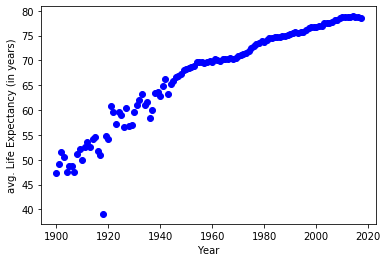

In [41]:
plot_data = life_expectancy_total[(life_expectancy_total.Race == 'All Races') & (life_expectancy_total.Sex == 'Both Sexes')] 
plt.plot(plot_data['Year'], plot_data['Average Life Expectancy (Years)'], 'bo')
plt.ylabel('avg. Life Expectancy (in years)')
plt.xlabel('Year')
plt.show()

In [45]:
plot_data.tail(10)

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
108,2008,All Races,Both Sexes,78.2,774.9
109,2009,All Races,Both Sexes,78.5,749.6
110,2010,All Races,Both Sexes,78.7,747.0
111,2011,All Races,Both Sexes,78.7,741.3
112,2012,All Races,Both Sexes,78.8,732.8
113,2013,All Races,Both Sexes,78.8,731.9
114,2014,All Races,Both Sexes,78.9,724.6
115,2015,All Races,Both Sexes,78.7,733.1
116,2016,All Races,Both Sexes,78.7,728.8
117,2017,All Races,Both Sexes,78.6,731.9


Volatile in the beginning (outlier: 1918), but since the 1950 the life expectancy increases (up until 2016), then it starts to decline a bit. As a side remark: in 2016 the global life expectancy was 72 years (WHO).
Let's check now for the LE within the USA.

In [60]:
# Average LE per area, Years: 2010, 2014
life_expectancy_total_1014_grouped = life_expectancy_total_1014.groupby(['metro_nonmetro', 'year'], as_index = False).mean()
life_expectancy_total_1014_grouped = life_expectancy_total_1014_grouped.append(pd.DataFrame({"metro_nonmetro":["USA", "USA"], "year":[2010, 2014], "value":[78.7, 78.9]}), ignore_index = True) # add data for USA total

In [61]:
life_expectancy_total_1014_grouped

,metro_nonmetro,year,value
0,Metropolitan,2010,78.121184
1,Metropolitan,2014,78.227539
2,Nonmetropolitan,2010,77.449970
3,Nonmetropolitan,2014,77.469266
4,USA,2010,78.700000
5,USA,2014,78.900000


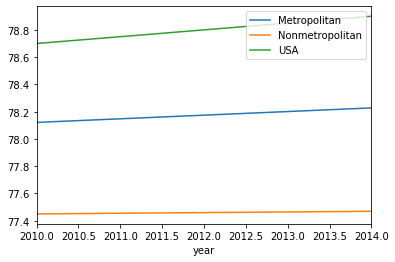

In [77]:
# TODO work out a better chart

fig, ax = plt.subplots()
for label, grp in life_expectancy_total_1014_grouped.groupby('metro_nonmetro'):
    grp.plot(x = 'year', y = 'value', ax = ax, label = label, kind = 'line')

Only spares data is available, so we have to resort to other measures, e.g. the median age for each state, from 2010 to 2017.

In [88]:
median_age_per_state = loadIndicatorData(dir = 'median-age', idct = 'median-age')
median_age_per_state

,metro_nonmetro,year,county_name,state_abbr,value
0,Metropolitan,2010,Anchorage Municipality,AK,32.8
1,Metropolitan,2010,Fairbanks North Star Borough,AK,30.9
2,Metropolitan,2010,Matanuska-Susitna Borough,AK,34.7
3,Metropolitan,2010,Autauga County,AL,37.1
4,Metropolitan,2010,Baldwin County,AL,41.2
...,...,...,...,...,...
25131,Nonmetropolitan,2017,Sweetwater County,WY,32.8
25132,Nonmetropolitan,2017,Teton County,WY,36.5
25133,Nonmetropolitan,2017,Uinta County,WY,33.8
25134,Nonmetropolitan,2017,Washakie County,WY,42.9


In [101]:
plot_data = median_age_per_state.groupby(['state_abbr', 'year']).mean()[:80]
plot_data
#fig, ax = plt.subplots()
#for label, grp in plot_data:
#    grp.plot(x = 'year', y = 'value', ax = ax, label = label, kind = 'bar')


value
state_abbr year           
AK         2010  36.596552
           2011  36.648276
           2012  36.641379
           2013  36.700000
           2014  36.648276
...                    ...
FL         2013  42.831343
           2014  43.102985
           2015  43.311940
           2016  43.555224
           2017  41.716418

[80 rows x 1 columns]